<img src="Imagenes/FER2013.jpg" alt="Imagen creada con inteligencia artificial y editada con Microsoft Paint" style="border-radius: 15px; width: 1500px; height: 500px;">


*Imagen creada con inteligencia artificial.*


## **INTRODUCCIÓN**

En este Jupyter Notebook se hará una visualización y un pequeño EDA del dataset “FER-2013”. Este dataset se empleará para entrenar el modelo que reconocerá   
la expresión facial. El significado del nombre "FER-2013" es: "Facial Expression Recognition 2013", o sea, "Reconocimiento de Expresiones Faciales 2013"    
y es un conjunto de datos utilizado para el reconocimiento de expresiones faciales que introducido durante la competencia de Kaggle  
"Challenges in Representation Learning: Facial Expression Recognition Challenge" en 2013.



## **BIBLIOTECAS USADAS:**

In [1]:
import numpy as np
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image 
import math


## **CARGA DEL DASET**

In [2]:
file_path = './datos/fer2013/fer2013.csv'
df = pd.read_csv(file_path)

## **PEQUEÑA VISUALIZACIÓN DEL DATA SET**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


>Vemos que hay 35,887 entradas o filas, es decir, 35,887 fotografías; ninguna columna tiene nulos."

In [4]:
print("Primeras filas del dataframe:")
df.head(5)

Primeras filas del dataframe:


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
df['emotion'].value_counts(True)

emotion
3    0.250481
6    0.172709
4    0.169337
2    0.142698
0    0.138017
5    0.111517
1    0.015242
Name: proportion, dtype: float64

> Vemos que el etiquetado de las emociones está como números enteros en vez de cadenas. La emoción que corresponde a cada número/código es fácilmente accesible.    
ChatGPT conoce bien este dataset, además, buscando en Google es fácil encontrarlo.[ Aquí](https://www.kaggle.com/datasets/msambare/fer2013) dejo un enlace a Kaggle donde se puede ver.
>
>También vemos que no está balanceado; no todas las emociones tienen la misma cantidad de fotografías. Esto será tenido en cuenta en la fase de modelado. 
>  




In [6]:
df['Usage'].value_counts(True)

Usage
Training       0.799983
PublicTest     0.100008
PrivateTest    0.100008
Name: proportion, dtype: float64

>"Vemos que prácticamente el ~80% de las fotografías están destinadas al train, estando el ~20% destinado a dos tests, de ~10% cada uno."


## **CARACTERISTICAS DE LAS IMAGENES**

In [11]:
# Obtener el tamaño en píxeles de las imágenes
df['num_pixels'] = df['pixels'].apply(lambda x: len(x.split()))

# Calcular estadísticas sobre el tamaño en píxeles
min_pixels = df['num_pixels'].min()
max_pixels = df['num_pixels'].max()


print(f"Tamaño mínimo de imagen en píxeles: {min_pixels}")
print(f"Tamaño máximo de imagen en píxeles: {max_pixels}")

print(f"Por lo que las imagenes son de {int(math.sqrt(max_pixels))}x{int(math.sqrt(max_pixels))} ")



Tamaño mínimo de imagen en píxeles: 2304
Tamaño máximo de imagen en píxeles: 2304
Por lo que las imagenes son de 48x48 


>Vemos que todas tienen el mismo tamaño.

In [8]:
ejemplo_pixels = df['pixels'].iloc[0] #Sabemos que todas las final tienen las misma caracteristicas, asi que cogemos una cualquiera.

# Dividimos la cadena de píxeles en valores individuales y convertimos a enteros
valores_pixeles = list(map(int, ejemplo_pixels.split()))

# Verificamos si todos los valores están dentro del rango de 0 a 255
todos_en_rango = all(0 <= pixel <= 255 for pixel in valores_pixeles)

if todos_en_rango:
    print("Las imágenes del dataset FER-2013 son en escala de grises.")
else:
    print("Las imágenes del dataset FER-2013 son a color (o tienen valores fuera del rango 0-255).")



Las imágenes del dataset FER-2013 son en escala de grises.


## **VISUALIZACIÓN DE LAS IMAGENES**

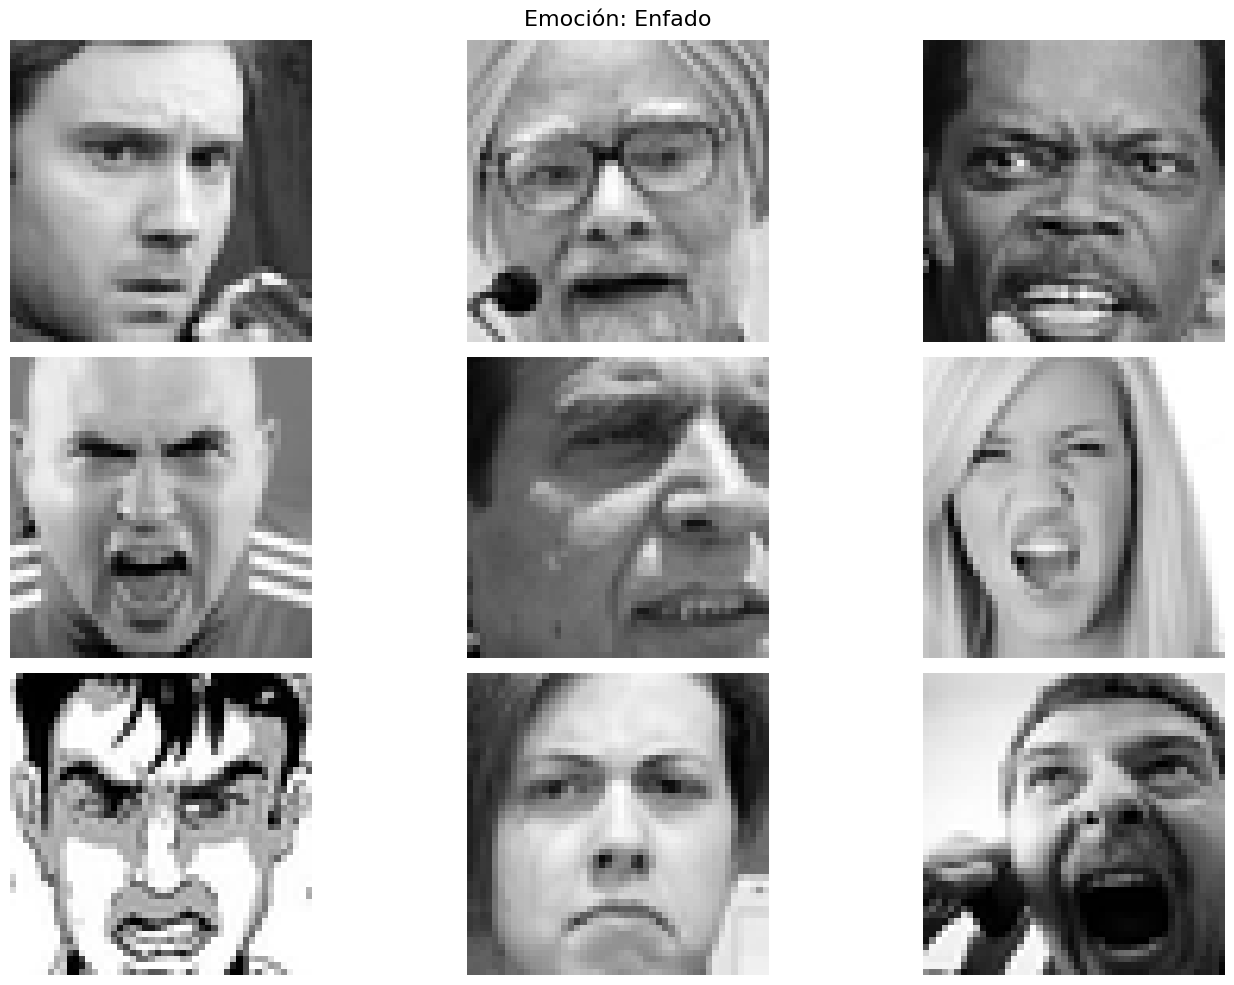

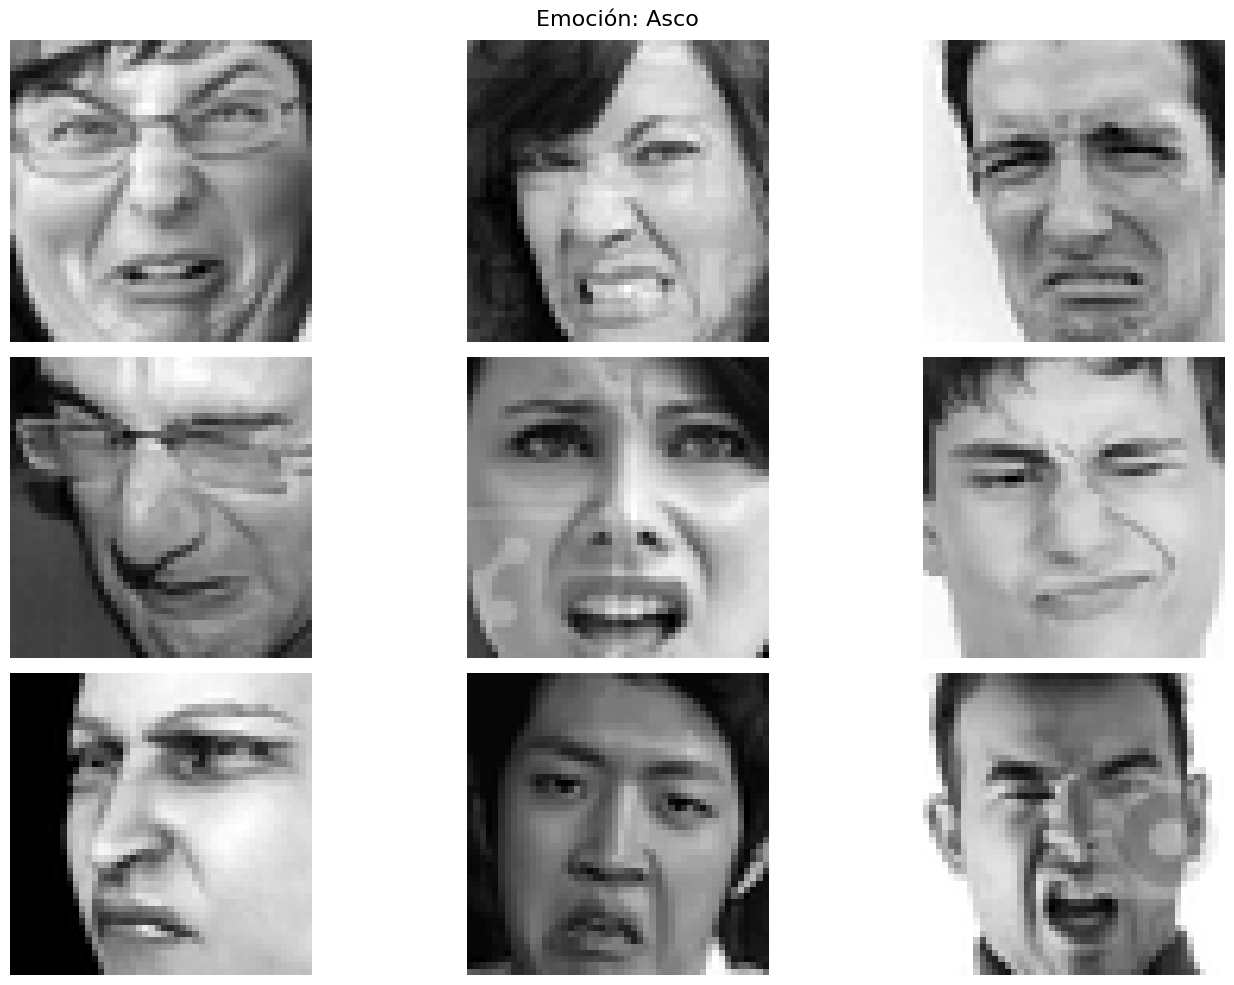

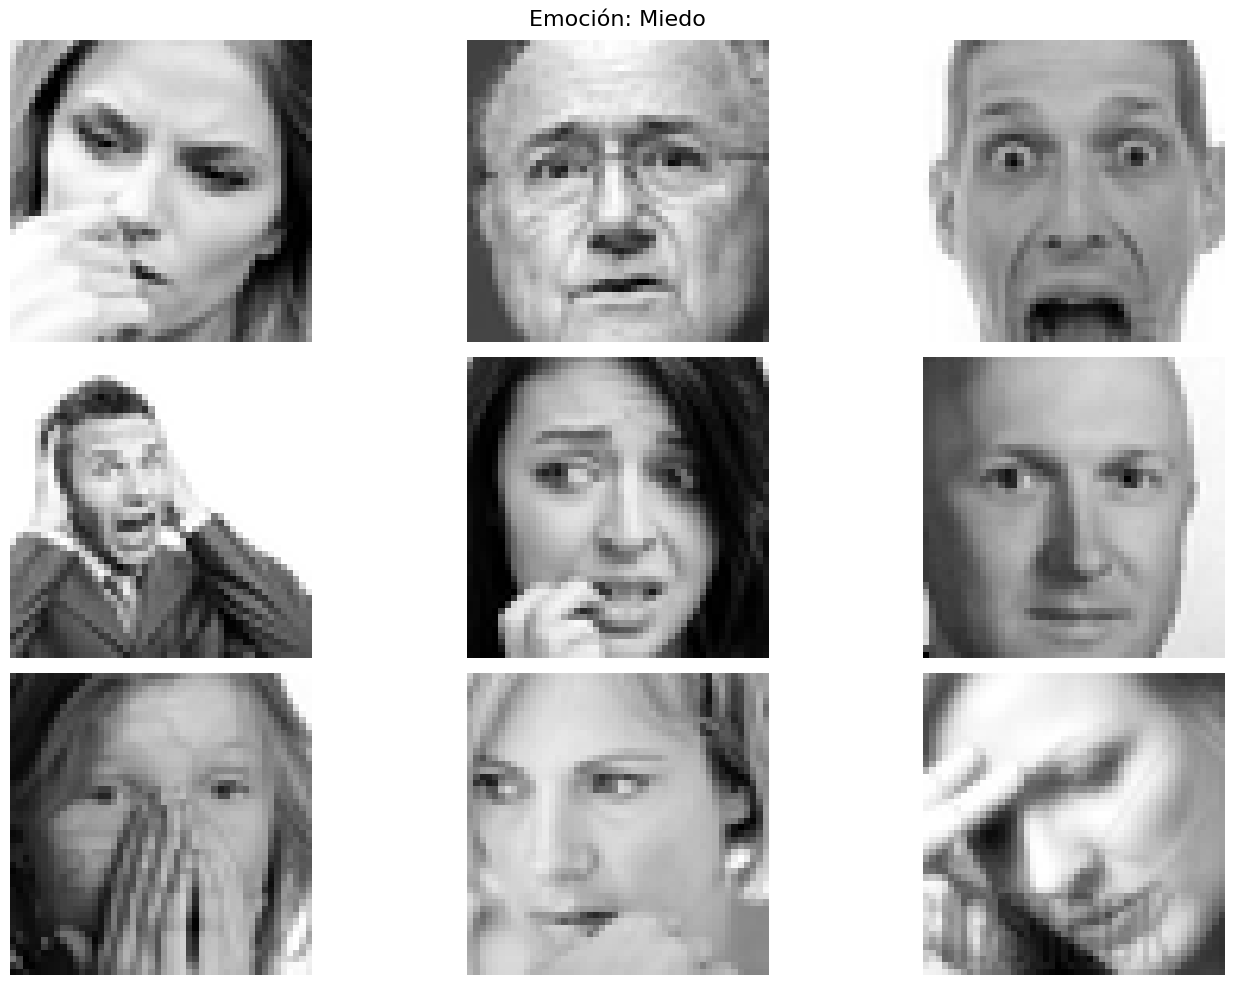

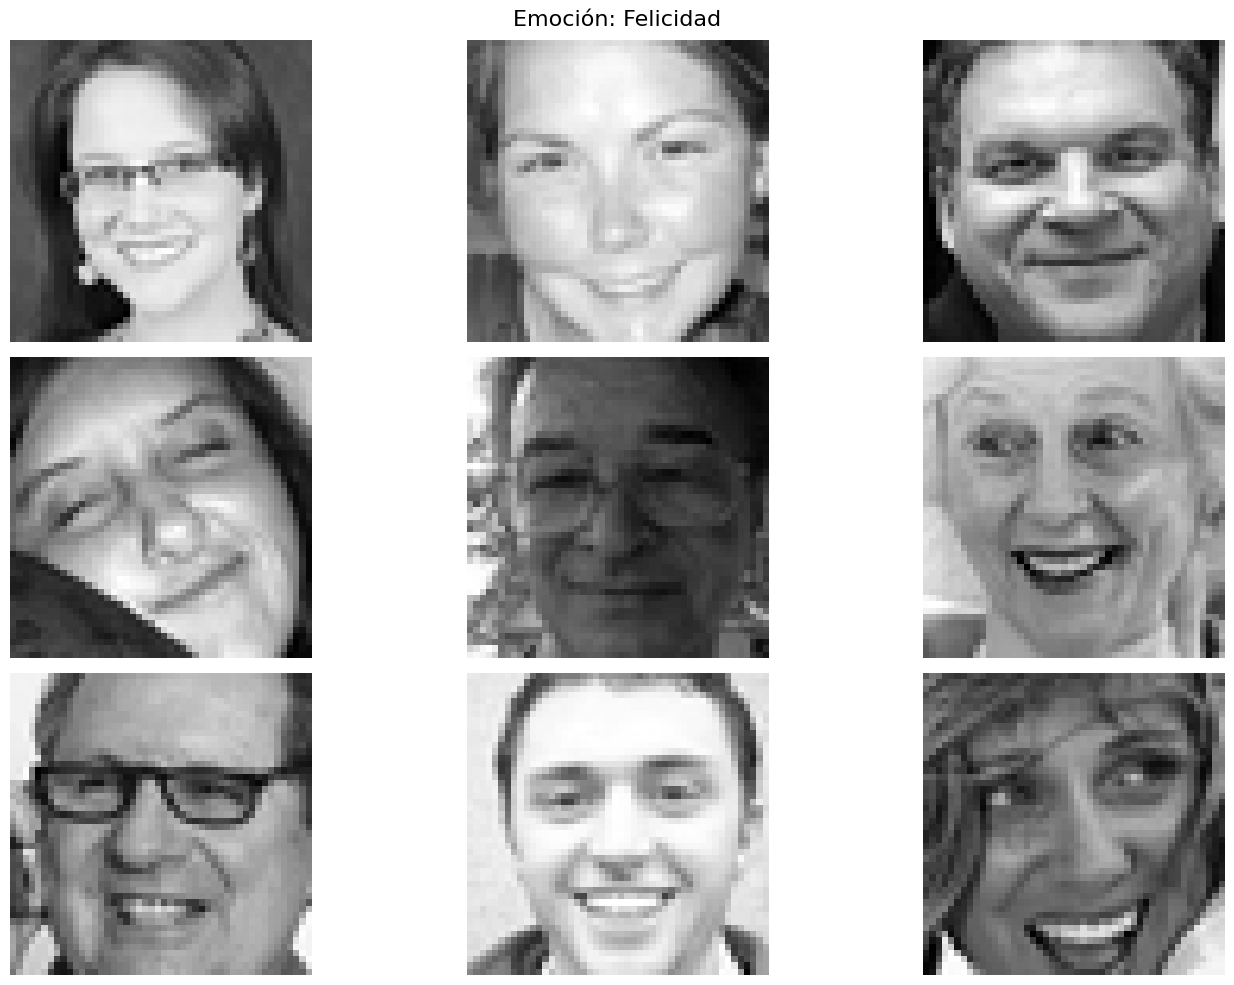

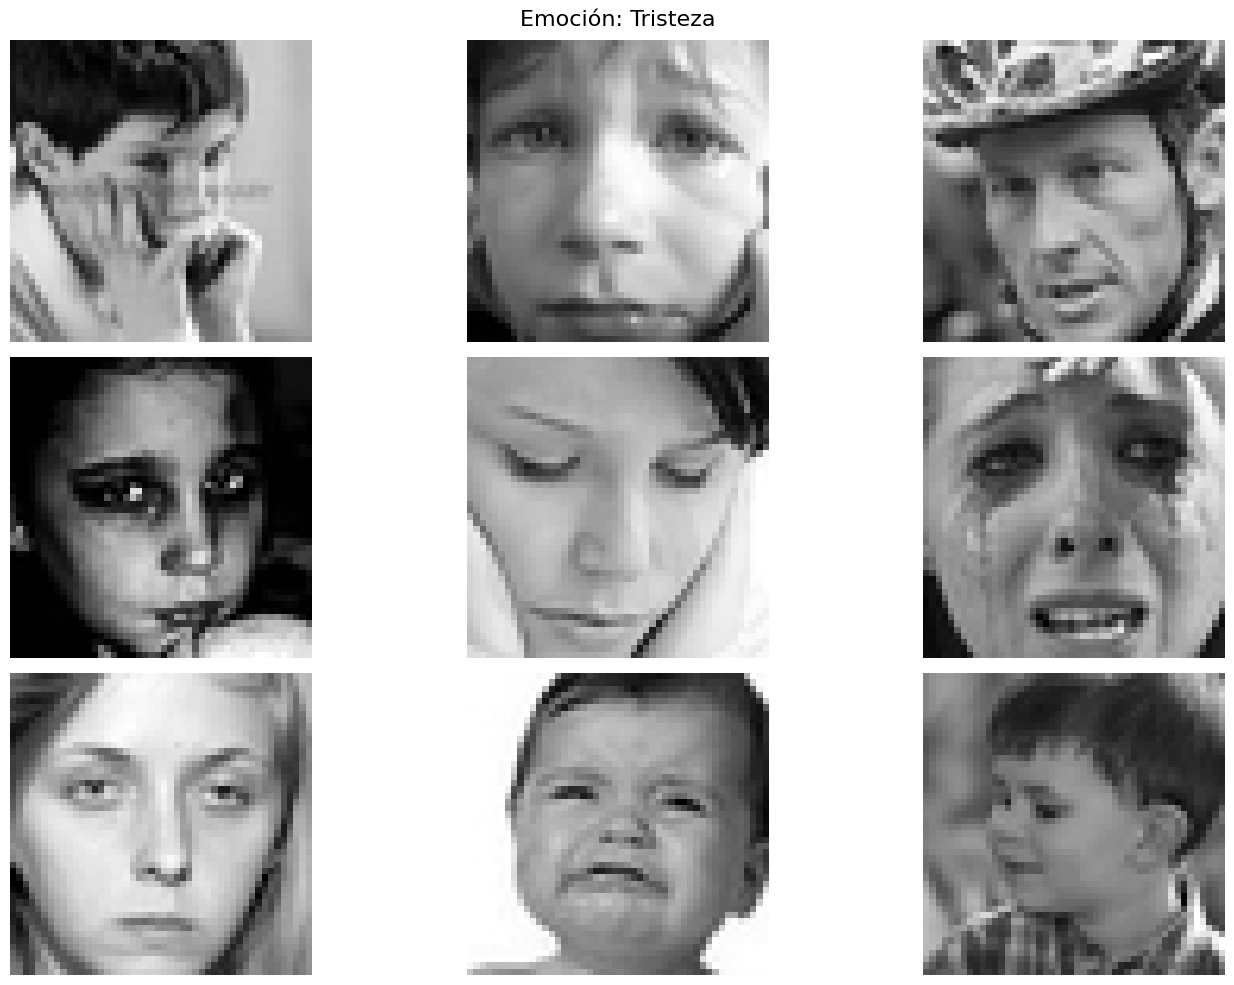

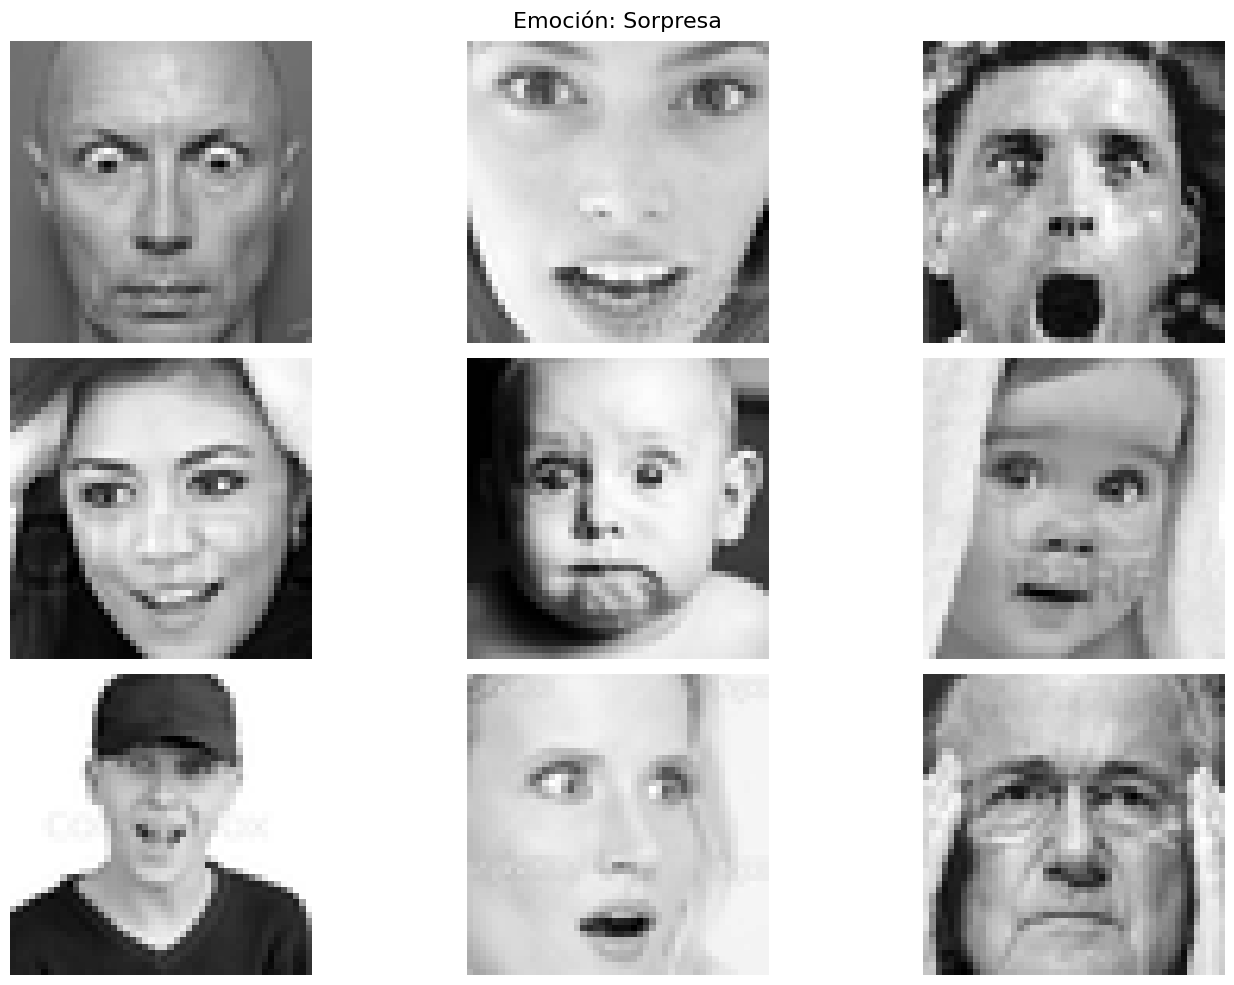

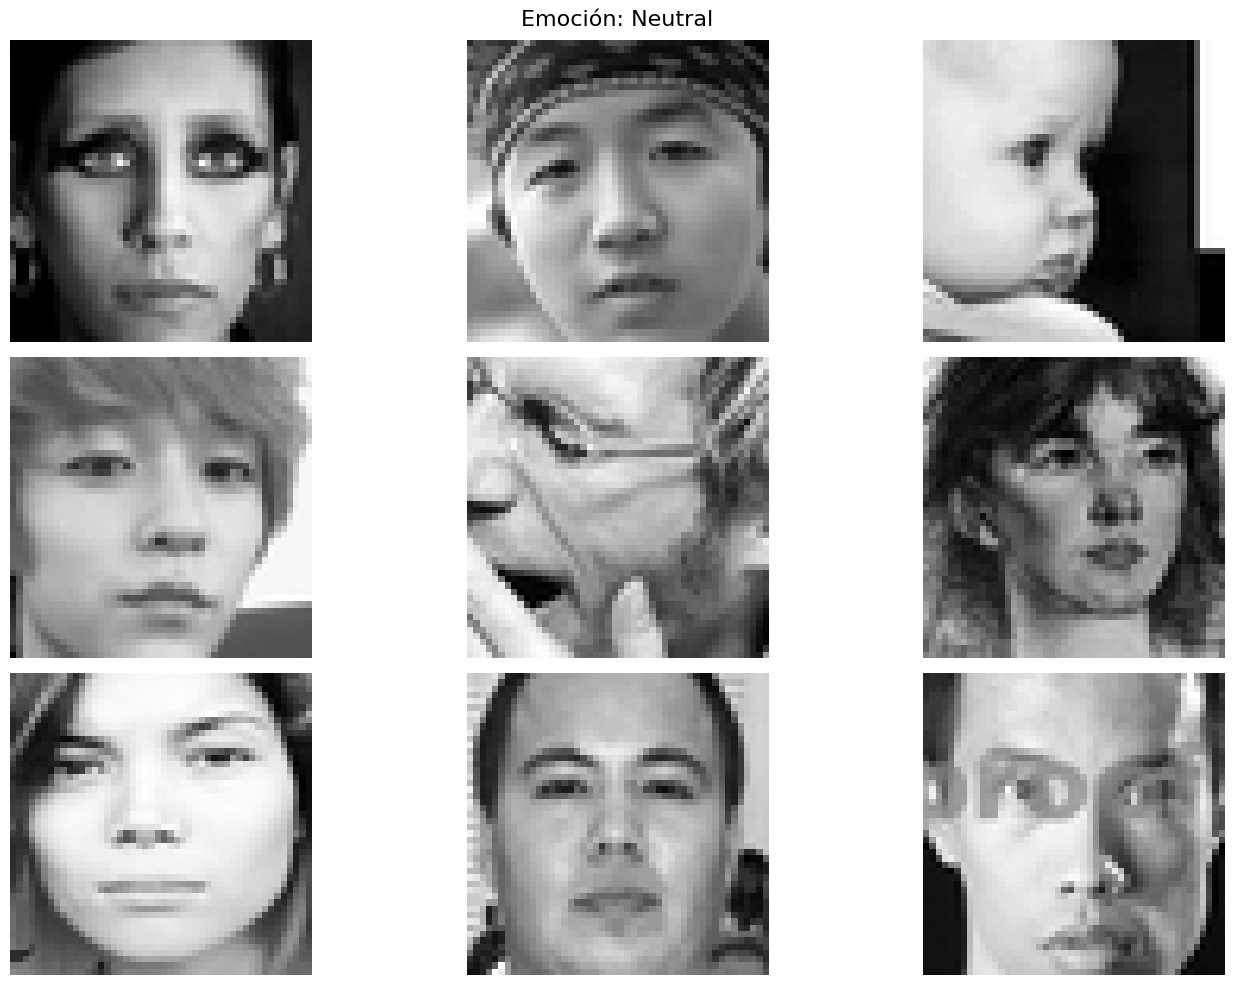

In [9]:
emotion_labels = {
    0: 'Enfado',
    1: 'Asco',
    2: 'Miedo',
    3: 'Felicidad',
    4: 'Tristeza',
    5: 'Sorpresa',
    6: 'Neutral'
}

# Función para mostrar imágenes de una emoción específica
def mostrar_imagenes_emocion(emotion):
    filtered_df = df[df['emotion'] == emotion].head(9)

    # Configurar la visualización de las imágenes en 3 columnas
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
    fig.suptitle(f'Emoción: {emotion_labels[emotion]}', fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < len(filtered_df):
            pixels = np.array(filtered_df.iloc[i]['pixels'].split(), dtype='int').reshape(48, 48)
            ax.imshow(pixels, cmap='gray')
            ax.axis('off')
    plt.tight_layout()
    plt.show()


for emotion in range(7):  # Hay 7 emociones en total (0 a 6)
    mostrar_imagenes_emocion(emotion)

## **CONCLUSIÓN FINAL**

Hacer un análisis exploratorio de datos, EDA, suele ser habitual en datos tabulares y que sean 'fácilmente' analizables.  
En el caso de un dataset de fotografías puede resultar algo más complejo. Sin embargo, explorar la cantidad de fotografías   
de cada etiqueta, el tamaño de estas, los canales y en general la aproximación que hemos hecho en este notebook puede ser   
suficiente para entender las características del dataset "FER-2013".  

Hemos examinado:
- Las etiquetas disponibles en el dataset.
- El tamaño del dataset, tanto para el conjunto de entrenamiento como para el conjunto de prueba.
- El tamaño y modo de color de las imágenes.
- Visualización de muestras aleatorias de imágenes de cada etiqueta.

Este análisis nos proporciona una idea inicial sobre la estructura y las características del dataset, preparándonos para entrenamiento   
de modelos de reconocimiento de expresiones faciales.